# Data Science and Business Analytics

### Task-5 - Prediction using Decision Tree Algorithm - IRIS Dataset

# Author : Ashish Kumar Jha 

##### Problem Statement 

Create the decision Tree Classifier and visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [33]:
#Importing the required python libraries
import sklearn.datasets as data
import pandas as pd

In [34]:
#Imporing Datasets
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [35]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [36]:
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
141,6.9,3.1,5.1,2.3
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [17]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [19]:
Y =iris.target

In [20]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Using train and test ...sklearn model selection

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,Y, test_size=0.33,random_state=30)

In [22]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
6,4.6,3.4,1.4,0.3
67,5.8,2.7,4.1,1.0
144,6.7,3.3,5.7,2.5
92,5.8,2.6,4.0,1.2
21,5.1,3.7,1.5,0.4
...,...,...,...,...
53,5.5,2.3,4.0,1.3
130,7.4,2.8,6.1,1.9
140,6.7,3.1,5.6,2.4
45,4.8,3.0,1.4,0.3


In [23]:
y_train

array([0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2,
       0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0,
       0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2,
       2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0])

In [38]:
X_test.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
20,5.4,3.4,1.7,0.2
5,5.4,3.9,1.7,0.4
3,4.6,3.1,1.5,0.2
101,5.8,2.7,5.1,1.9
82,5.8,2.7,3.9,1.2
80,5.5,2.4,3.8,1.1
123,6.3,2.7,4.9,1.8
145,6.7,3.0,5.2,2.3
74,6.4,2.9,4.3,1.3
107,7.3,2.9,6.3,1.8


In [27]:
y_test

array([0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       0, 0, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       2, 1, 1, 1, 1, 1])

## Applying Decision Tree Algorithm

In [28]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train,y_train)

print('Decision Tree Classifier Created Successfully')

Decision Tree Classifier Created Successfully


In [29]:
y_predict = decision.predict(X_test)

### Importing Confusion matrix 

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[13,  0,  0],
       [ 0, 14,  4],
       [ 0,  1, 18]], dtype=int64)

In [31]:
#Importing Tree
from sklearn import tree
import matplotlib.pyplot as plt

#### Decision Tree Visualization

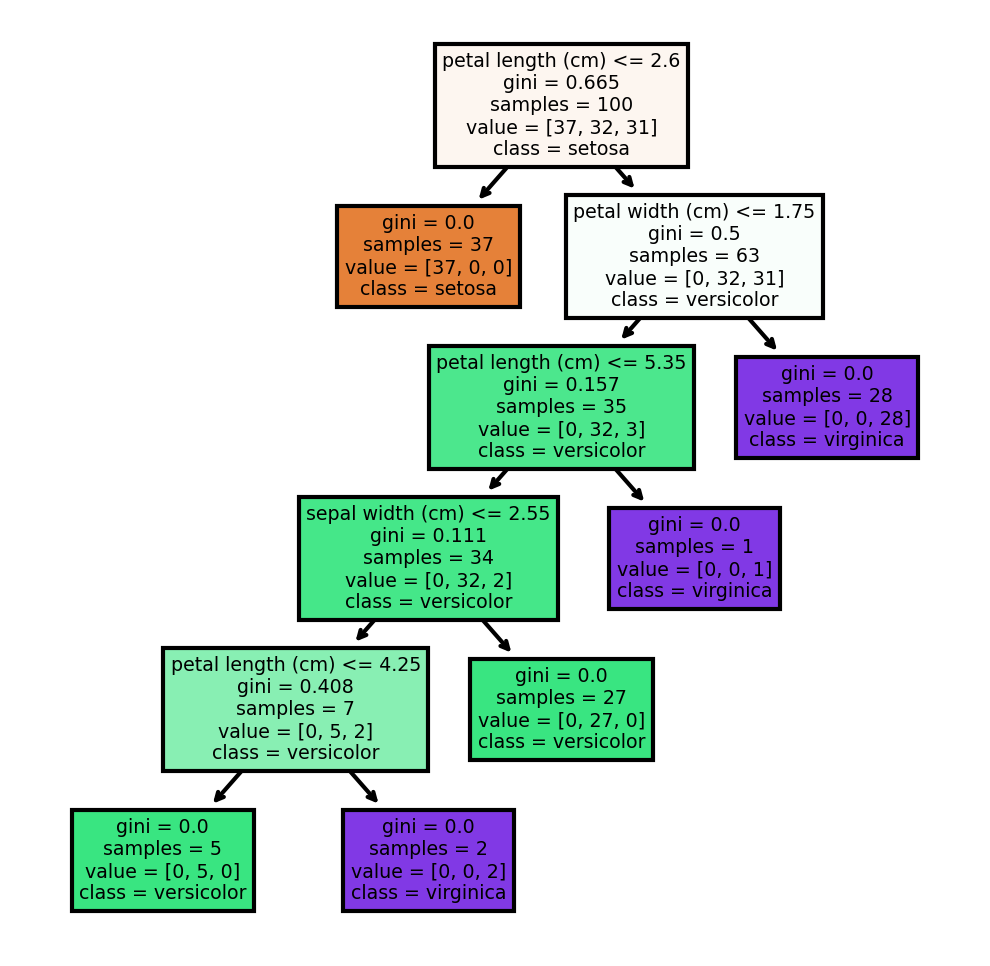

In [32]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(decision, feature_names = fn, class_names = cn, filled = True);

# The task is comleted, Thank you!